<a href="https://colab.research.google.com/github/TristanNUSantos/Emtech2/blob/main/SantosEspiritu_PrelimExam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Santos, Tristan Neal and Espiritu, Maj
<br> Section:CPE32S9
<br> Emtech 2 Prelims


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import sklearn.metrics as sm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [ ]:
datas = pd.read_csv('/content/drive/MyDrive/Laptop_price.csv')

In [ ]:
df=pd.DataFrame(datas)
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             1000 non-null   object 
 1   Processor_Speed   1000 non-null   float64
 2   RAM_Size          1000 non-null   int64  
 3   Storage_Capacity  1000 non-null   int64  
 4   Screen_Size       1000 non-null   float64
 5   Weight            1000 non-null   float64
 6   Price             1000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 54.8+ KB


In [ ]:
df["Brand"].unique()

array(['Asus', 'Acer', 'Lenovo', 'HP', 'Dell'], dtype=object)

In [ ]:
df["Brand"]=df["Brand"].replace({'Asus':5, 'Acer':4, 'Lenovo':3, 'HP':2, 'Dell':1})

In [ ]:
df.head()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,5,3.830296,16,512,11.185147,2.641094,17395.093065
1,4,2.912833,4,1000,11.311372,3.260012,31607.605919
2,3,3.241627,4,256,11.853023,2.029061,9291.023542
3,4,3.806248,16,512,12.280360,4.573865,17436.728334
4,4,3.268097,32,1000,14.990877,4.193472,32917.990718


In [ ]:
df.corr()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
Brand,1.000000,0.026002,-0.047284,0.040916,0.001499,0.007706,0.039683
Processor_Speed,0.026002,1.000000,0.021391,-0.067576,-0.013425,-0.054603,-0.050737
RAM_Size,-0.047284,0.021391,1.000000,0.002111,-0.036002,-0.025382,0.061237
Storage_Capacity,0.040916,-0.067576,0.002111,1.000000,-0.027560,0.041335,0.997908
Screen_Size,0.001499,-0.013425,-0.036002,-0.027560,1.000000,0.021995,-0.026740
Weight,0.007706,-0.054603,-0.025382,0.041335,0.021995,1.000000,0.038417
Price,0.039683,-0.050737,0.061237,0.997908,-0.026740,0.038417,1.000000


In [ ]:
columns = datas.columns

In [ ]:
# find numerical variables

numerical = [var for var in datas.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 7 numerical variables

The numerical variables are : ['Brand', 'Processor_Speed', 'RAM_Size', 'Storage_Capacity', 'Screen_Size', 'Weight', 'Price']


In [ ]:
df[numerical].head()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,5,3.830296,16,512,11.185147,2.641094,17395.093065
1,4,2.912833,4,1000,11.311372,3.260012,31607.605919
2,3,3.241627,4,256,11.853023,2.029061,9291.023542
3,4,3.806248,16,512,12.280360,4.573865,17436.728334
4,4,3.268097,32,1000,14.990877,4.193472,32917.990718


In [ ]:
# find categorical variables

categorical = [var for var in datas.columns if df[var].dtype!='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 7 categorical variables

The categorical variables are : ['Brand', 'Processor_Speed', 'RAM_Size', 'Storage_Capacity', 'Screen_Size', 'Weight', 'Price']


In [ ]:
df[categorical].head()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,5,3.830296,16,512,11.185147,2.641094,17395.093065
1,4,2.912833,4,1000,11.311372,3.260012,31607.605919
2,3,3.241627,4,256,11.853023,2.029061,9291.023542
3,4,3.806248,16,512,12.280360,4.573865,17436.728334
4,4,3.268097,32,1000,14.990877,4.193472,32917.990718


In [ ]:
corr = df.corr()
corr

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
Brand,1.000000,0.026002,-0.047284,0.040916,0.001499,0.007706,0.039683
Processor_Speed,0.026002,1.000000,0.021391,-0.067576,-0.013425,-0.054603,-0.050737
RAM_Size,-0.047284,0.021391,1.000000,0.002111,-0.036002,-0.025382,0.061237
Storage_Capacity,0.040916,-0.067576,0.002111,1.000000,-0.027560,0.041335,0.997908
Screen_Size,0.001499,-0.013425,-0.036002,-0.027560,1.000000,0.021995,-0.026740
Weight,0.007706,-0.054603,-0.025382,0.041335,0.021995,1.000000,0.038417
Price,0.039683,-0.050737,0.061237,0.997908,-0.026740,0.038417,1.000000


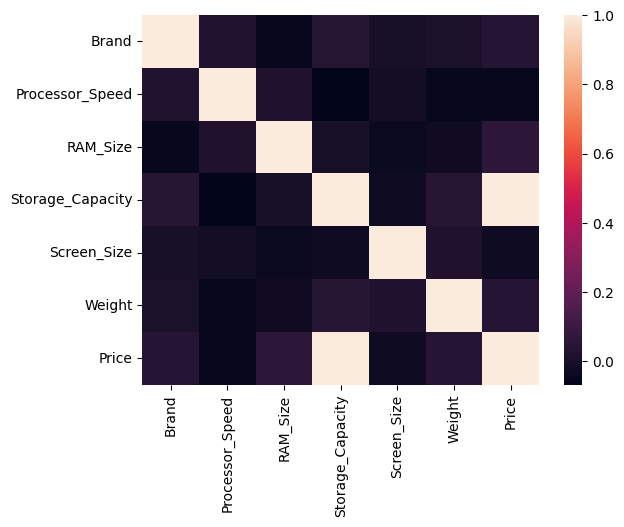

In [ ]:
htmp = sns.heatmap(corr)
plt.show(htmp)

<Axes: xlabel='Weight', ylabel='Price'>

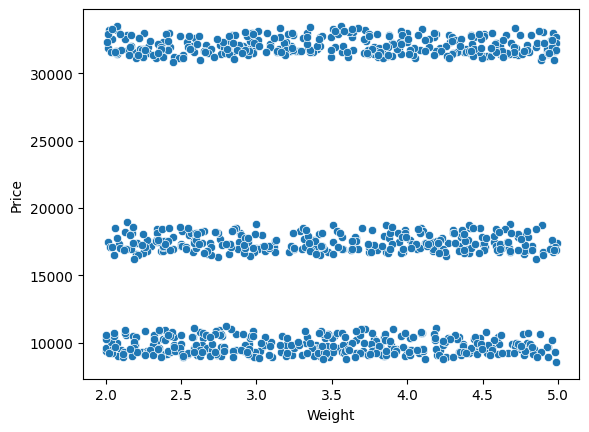

In [ ]:
#For visualization of data
sns.scatterplot(x="Weight", y="Price", data=df)

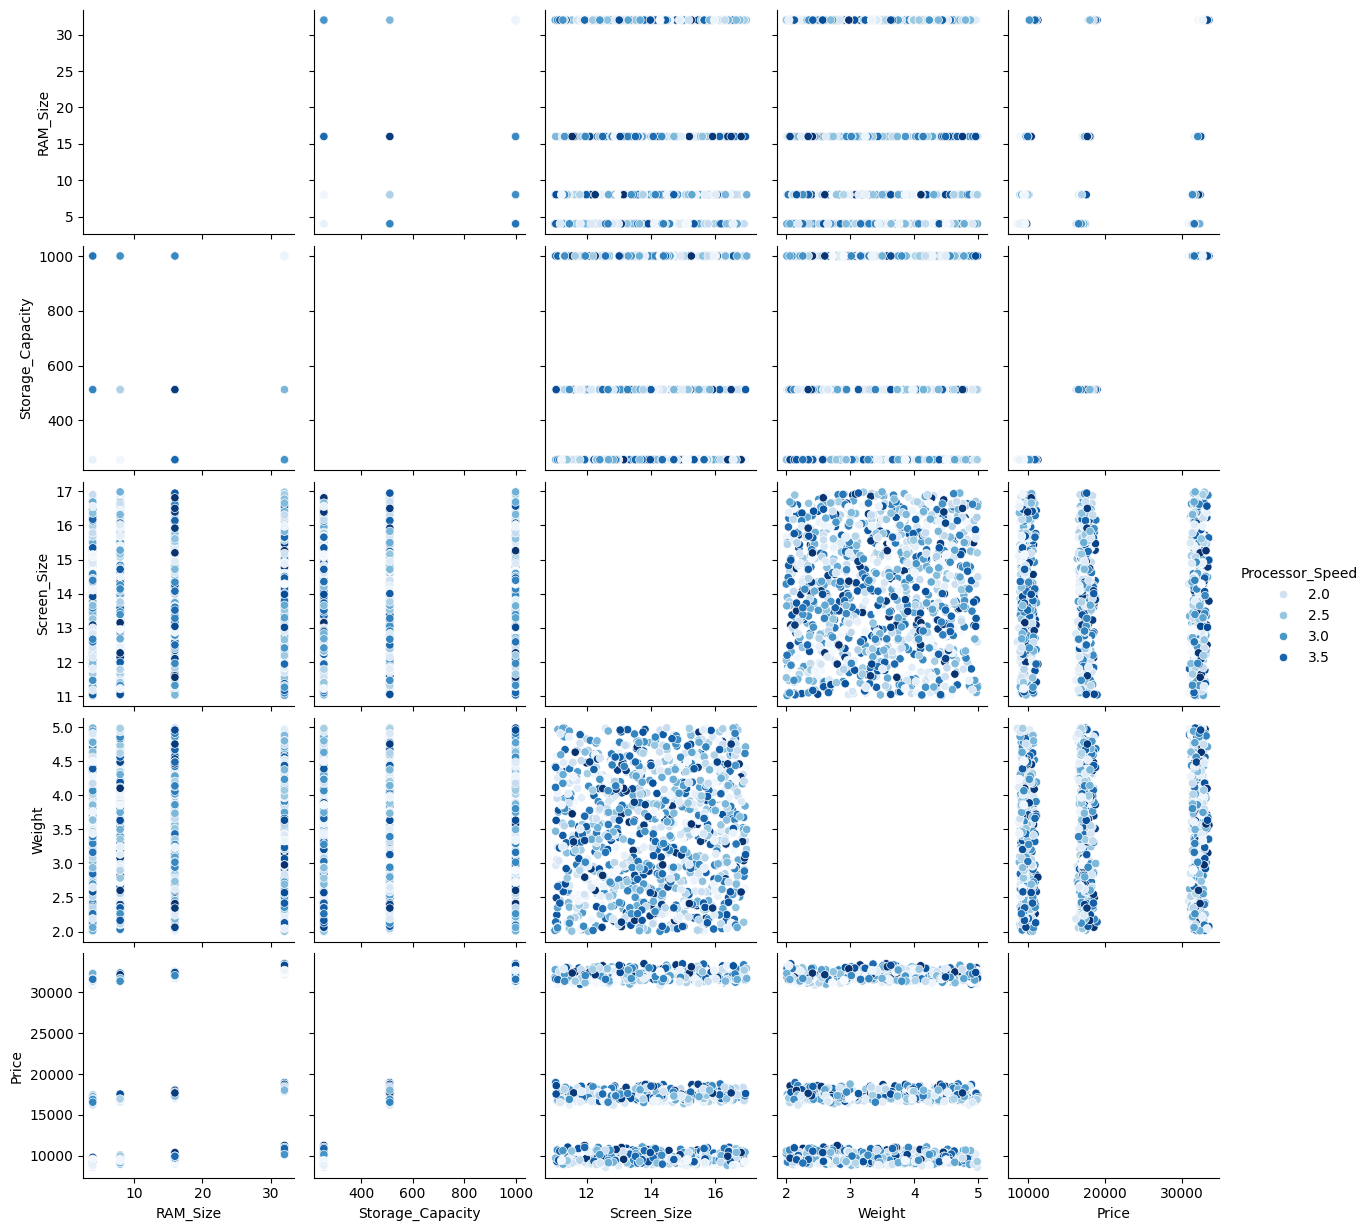

In [ ]:
input_col = ['Processor_Speed', 'RAM_Size', 'Storage_Capacity', 'Screen_Size', 'Weight','Price']
sns.pairplot(df[input_col], hue = 'Processor_Speed', palette='Blues')

# Linear Regression

# Singular LR

In [ ]:
x = np.array(df['Processor_Speed'].head(100)).reshape(-1,1)
y = np.array(df['Price'].head(100)).reshape(-1,1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Text(0, 0.5, 'Price')

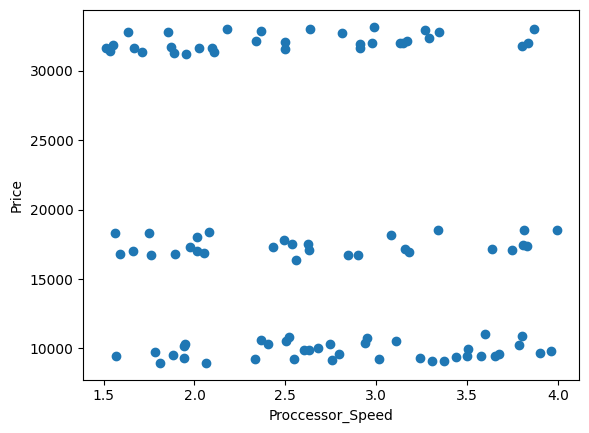

In [ ]:
plt.scatter(x, y)
plt.xlabel("Proccessor_Speed")
plt.ylabel("Price")

In [ ]:
print("Mean absolute error =")

# Multiple LR

In [ ]:
x = df.drop(columns="Price")
y=df["Price"]

In [ ]:
plt.scatter(y_train_pred)

# Polynomial LR

# Logistic Regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
%matplotlib inline
import warnings #to remove the warnings
warnings.filterwarnings('ignore')

In [ ]:
df.head()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,5,3.830296,16,512,11.185147,2.641094,17395.093065
1,4,2.912833,4,1000,11.311372,3.260012,31607.605919
2,3,3.241627,4,256,11.853023,2.029061,9291.023542
3,4,3.806248,16,512,12.280360,4.573865,17436.728334
4,4,3.268097,32,1000,14.990877,4.193472,32917.990718


In [ ]:
x = df[['Processor_Speed','RAM_Size','Storage_Capacity','Price']]
y = df['Brand']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
LR = LogisticRegression()

In [ ]:
LR.fit(x_train_scaled, y_train)

LogisticRegression()

In [ ]:
y_pred = LR.predict(x_test_scaled)

In [ ]:
sns.scatterplot(x="Processor_Speed", y="RAM_Size", hue="Price", data=datas)

# Decision Tree

In [ ]:
df.head()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,5,3.830296,16,512,11.185147,2.641094,17395.093065
1,4,2.912833,4,1000,11.311372,3.260012,31607.605919
2,3,3.241627,4,256,11.853023,2.029061,9291.023542
3,4,3.806248,16,512,12.280360,4.573865,17436.728334
4,4,3.268097,32,1000,14.990877,4.193472,32917.990718


In [ ]:
columns = ['Processor_Speed', 'RAM_Size', 'Storage_Capacity', 'Weight']
x_input = df[list(columns)].values
y_target = df["Brand"].values

In [ ]:
# Splitting nodes with a max depth of 3
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)
# Fitting the classifier using the input features
clf_train = clf_train.fit(x_input, y_target)

In [ ]:
from six import StringIO
with open('/content/laptop_price.dot', 'w') as f:
  f = tree.export_graphviz(clf_train, out_file=f, feature_names=columns)

In [ ]:
# Converting the graphvix DOT file into a png file
!dot -Tpng /content/laptop_price.dot -o /content/laptop_price.png

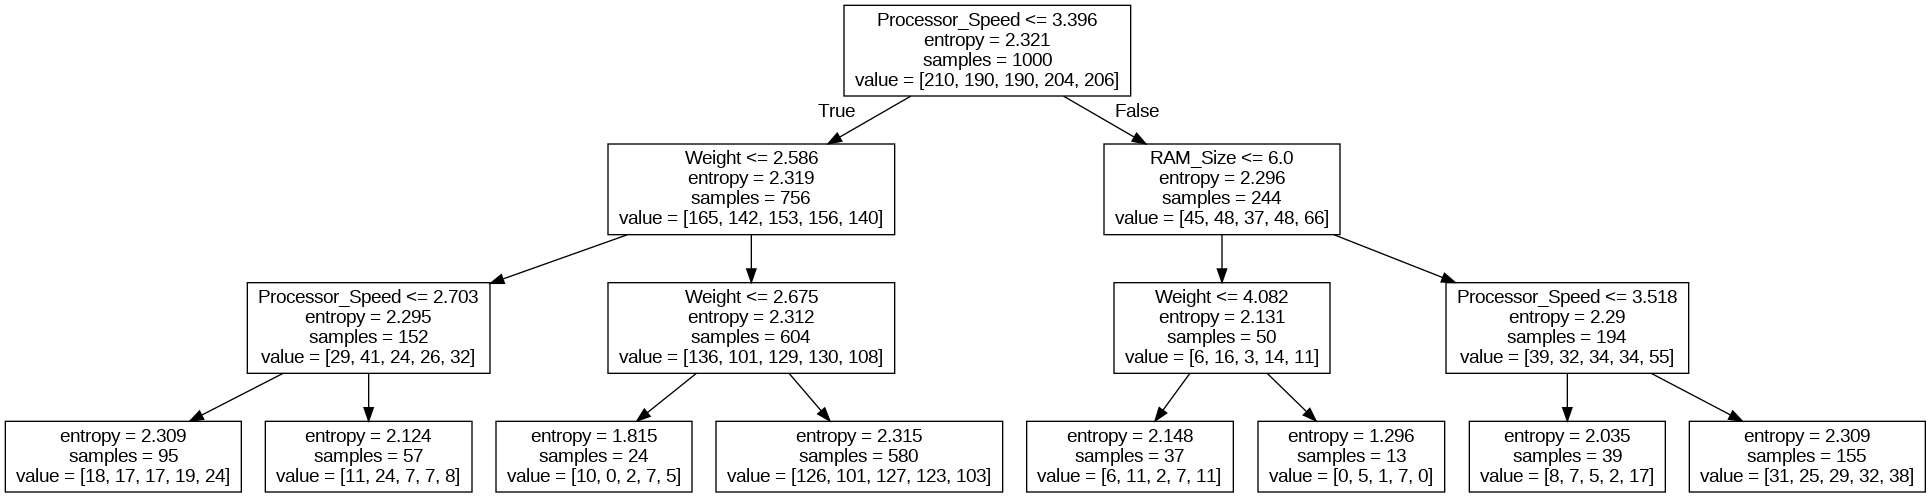

In [ ]:
from IPython.display import Image
Image("/content/laptop_price.png")

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df.head()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,5,3.830296,16,512,11.185147,2.641094,17395.093065
1,4,2.912833,4,1000,11.311372,3.260012,31607.605919
2,3,3.241627,4,256,11.853023,2.029061,9291.023542
3,4,3.806248,16,512,12.280360,4.573865,17436.728334
4,4,3.268097,32,1000,14.990877,4.193472,32917.990718


In [ ]:
Laptop_Price = df.dropna(subset=['Brand'])

In [ ]:
x = Laptop_Price[["Processor_Speed","RAM_Size","Storage_Capacity","Price"]]
y = Laptop_Price["Brand"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=90, random_state=50)


In [ ]:
rf_classifier.fit(x_train, y_train)

ValueError: Unknown label type: 'continuous'